

<center><a href="https://githubtocolab.com/hirwa-nshuti/UnderstandNN/blob/main/Convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" width="150" height="50"/></a></center>



#**Convolutional Neural Network**

*The notebook for deep introduction to Convolutional Neural Nets, implementations from scracth using Numpy and other advanced notes on written papers with summary of what I'll be learning.*

## Contents

- [1 - Introduction](#1)
  - [1.1 - Convolution Layer](#1-1)
  - [1.2 - Pooling Layers](#1-2)
- [2 - Convolutional layer with Numpy](#2)
  - [2.1 - Zero Padding](#2-1)
  - [2.2 - Convolve forward](#2-1)


<a name='1'></a>
## 1 - Introduction

Short notes on Convolutional Neural Nets.

A convolutional Neural network(CNN or ConvNet) is a Deep Learning Neural Network architecture which learns directly from data, eliminating the need for manual feature extraction. CNNs are particularly most useful for finding patterns in images to recognize objects, faces, and scenes. And they can also be quite effective when used for classifying non-image data such as audio, time series etc.

Refering to perceptrons the CNNs are regularized multilayer perceptrons. The regularization is to prevent them from proning to overrfitting on the training Data. And we can say that it is a feedforward neural network with input layer, hidden layer and output layer. And in the hidden layer the inputs are masked by activation function and later the **[ Convolution](https://en.wikipedia.org/wiki/Convolution)** operation.

*The three main layers of a CNN are Convolutional Layer, Pooling Layer, and Fully-Connected Layer. A simple example for CNN Architecture is [INPUT - CONV - RELU - POOL - FC]*

It is typically a stack of input layer, followed by convolutional laye, followed by activation, followed by pooling layer and lately feed the results to a fully connected layer network.


<a name='1-1'></a>
### 1.1 - Convolution layer 

**The Convolution layer** Takes the input images and pass them to convolution filters and each filter activates certain features of image fed to the network. This can be refered to as edge detection. When using python the convolution is implemented as `np.convolve`  in Tensorflow it is `tf.nn.conv2d` and in keras it is `tf.keras.layers.Conv2D` while when using PyTorch it can be implemented as `torch.nn.Conv2d`

#### ***Types of convolutions*** 
In convolution types that I will cover here are **valid**, **same** and **strided** convolution.

#### **valid convolution** 
Valid convolution we input an (n, n) dimmensional array and pass it to (f, f) diminsional convolutional filter to get (n-f+1, n-f+1) dimensional array as output.
As this may result into getting shrinked output array as we stack many convolution layers it is a better practice to introduce padding, strides filter to achieve the desired output array size.

#### **Same convolution** 
Same convolution the output array of the convolution step is always of the same dimension as the input array. Here padding helps to achieve this task and the padding values is obtained as  $ padding = \frac{f-1}{2}$ suppose we have an (n, n) dimensional array and we apply the padding p.
After padding an array the dimensions become (n+2p, n+2p) dimensional array and if we pass this into (f, f) filter the output array is (n+2p-f+1, n+2p-f+1) and according to the padding value the $2p = f-1$ means after the convolution the output array will have (n, n) dimension.

#### **Strided Convolution**
In strided convolution we add the stride property to govern steps being taken by filter across the image matrix. If we pass the (n, n) image to a filter (f, f) with padding p, and stride s, the output of a strided convolution is ($\frac{n+2f-p}{s}+1$,  $\frac{n+2f-p}{s}+1$).


<a name='1-2'></a>
### 1.2 - Pooling layer 

The pooling layer main role is to perform a non linear operation of reducing the number of parameters to that the network needs to learn efficiently. Hence controling the overfitting of the network. The most common used pooling filter is 2x2

There are two types of pooling the max and average pooling

#### **Average Pooling**
The average pooling takes the average of the values of the input window size(determined by pooling size mostly 2x2) and then the window is strided according to the stride value provided.

#### **Max Pooling**
Quite similar to average pooling except that the pooling is done by taking the maximum value over the input window size and then the window is strided according to the stride value provided.

<a name="#2"></a>
## 2 - Convolutional layer with Numpy

Importing the libraries to use

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(5)

<a name="2-1"></a>

### 2.1 - Zero Padding

Zero padding helps to control the shrinkage of dimension of input array after applying filters larger than 1x1, and to avoid loosing information at the boundaries, forexample: when weights in a filter drop rapidly away from its center.

In [ ]:
def zero_pad(x, pad=1):
    """
    The function to padd with zeros all the images from dataset x.

    Parameters
    ----------
    x
        a python numpy array of shape (examples, height, width, channels) 
        simply a batch of examples images.
    pad
        an integer showing amount of padding to be masked on the images inputs
        default is 1.

    Returns
    -------
    ret
        a python numpy array with elements padded with zeros,
        and it must have the same shape as x.
    """
    return np.pad(x, ((0,0), (pad, pad),(pad, pad), (0,0)), mode='constant', constant_values=(0,0))

In [ ]:
# Some padded examples
x = np.random.randn(5, 4, 4, 1)
padded_x = zero_pad(x, 1)
print(f"x.shape={x.shape}")
print(f"padded_x.shape={padded_x.shape}")

x.shape=(5, 4, 4, 1)
padded_x.shape=(5, 6, 6, 1)


**Plotting original and padded images**

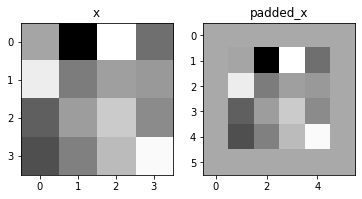

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title("x")
ax[0].imshow(x[1, :, :, 0])

ax[1].set_title("padded_x")
ax[1].imshow(padded_x[1, :, :, 0])

plt.show()

<a name="2-2"></a>

### 2.2 - Convolve forward

In the CNN layer we have two main functions the forward pass and backward pass, during the forward pass we pass the input n_h x n_w dimensional numpy array and perform filtering and max pooling on the input array. The output of a convolved network is called a feature map.

In [ ]:
def convolve_forward(prev_out, W, b, h_parameters):
    """
    The forward convolution pass. It receives the input array, perform the
    convolution and gives the feature maps.

    Parameters
    ----------
    prev_out
        output activations of the previous layer, 
        numpy array of shape (examples, n_h_prev, n_w_prev, n_channel_prev)
    W
        Weights numpy array (f, f, n_channel_prev, n_channel)
    b
        Biases, numpy array of shape (1, 1, 1, n_channel)
    hparameters
        python dictionary containing "stride" and "pad
    """
    pass